### Michael Hotaling
### Assignment 4: Sentiment Analysis
### 12/19/2020

### Importing basic libraries and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [2]:
df = pd.read_csv("DailyComments.csv")

In [3]:
df

,Day of Week,comments
0,Monday,"Hello, how are you?"
1,Tuesday,Today is a good day!
2,Wednesday,It's my birthday so it's a really special day!
3,Thursday,Today is neither a good day or a bad day!
4,Friday,I'm having a bad day.
5,Saturday,There' s nothing special happening today.
6,Sunday,Today is a SUPER good day!


### Cleaning

In [4]:
# We can use language_tools to fix some of the spelling errors and grammar issues in the dataset before cleaning it.
# Looking at our data, we can see that Thursdays submission should comtain nor instead of or
# We also have an extra space between "There" and " 's'" in the first word of Saturdays submission
# And Sundays submission is overly complicated since two adjectives are used in conjunction with each other

from language_tool_python import LanguageTool

tool = LanguageTool('en-US')
spell_checked = []
 
for i in df['comments']:
    matches = tool.correct(i)
    spell_checked.append(matches)
df['cleaned'] = spell_checked
df

,Day of Week,comments,cleaned
0,Monday,"Hello, how are you?","Hello, how are you?"
1,Tuesday,Today is a good day!,Today is a good day!
2,Wednesday,It's my birthday so it's a really special day!,It's my birthday so it's a really special day!
3,Thursday,Today is neither a good day or a bad day!,Today is neither a good day nor a bad day!
4,Friday,I'm having a bad day.,I'm having a bad day.
5,Saturday,There' s nothing special happening today.,There's nothing special happening today.
6,Sunday,Today is a SUPER good day!,Today is a Wonderful day!


In [5]:
# Now we can convert all the characters to lower case and remove punctuation

# Lower Case
df['cleaned'] = df['cleaned'].str.lower()

# Removing punctuation
df["cleaned"] = df['cleaned'].str.replace('[^\w\s]','')
df

,Day of Week,comments,cleaned
0,Monday,"Hello, how are you?",hello how are you
1,Tuesday,Today is a good day!,today is a good day
2,Wednesday,It's my birthday so it's a really special day!,its my birthday so its a really special day
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day nor a bad day
4,Friday,I'm having a bad day.,im having a bad day
5,Saturday,There' s nothing special happening today.,theres nothing special happening today
6,Sunday,Today is a SUPER good day!,today is a wonderful day


## Sentiment Analysis
### Home Brew (NEED TO FINISH)

In [6]:
counter = CountVectorizer()
bag_of_words = counter.fit_transform(np.array(df['comments'].values.astype('U')))

In [7]:
arr = bag_of_words.toarray()

In [8]:
pd.DataFrame(arr, columns= counter.get_feature_names())

,are,bad,birthday,day,good,happening,having,hello,how,is,...,neither,nothing,or,really,so,special,super,there,today,you
0,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
3,0,1,0,2,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
4,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
6,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


### Using Vader from NLTK

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [10]:
def vader_sentiment(arr):
    vader = SentimentIntensityAnalyzer()
    return vader.polarity_scores(arr)['compound']

df['vader'] = df['cleaned'].apply(vader_sentiment)

In [11]:
df

,Day of Week,comments,cleaned,vader
0,Monday,"Hello, how are you?",hello how are you,0.0000
1,Tuesday,Today is a good day!,today is a good day,0.4404
2,Wednesday,It's my birthday so it's a really special day!,its my birthday so its a really special day,0.5034
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day nor a bad day,0.1139
4,Friday,I'm having a bad day.,im having a bad day,-0.5423
5,Saturday,There' s nothing special happening today.,theres nothing special happening today,-0.3089
6,Sunday,Today is a SUPER good day!,today is a wonderful day,0.5719


### Using TextBlob from textblob

In [12]:
from textblob import TextBlob

In [13]:
def textblob_sentiment(arr):
    return TextBlob(arr).sentiment.polarity

In [14]:
df['textblob'] = df['cleaned'].apply(textblob_sentiment).round(4)

In [15]:
df

,Day of Week,comments,cleaned,vader,textblob
0,Monday,"Hello, how are you?",hello how are you,0.0000,0.0000
1,Tuesday,Today is a good day!,today is a good day,0.4404,0.7000
2,Wednesday,It's my birthday so it's a really special day!,its my birthday so its a really special day,0.5034,0.3571
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day nor a bad day,0.1139,0.0000
4,Friday,I'm having a bad day.,im having a bad day,-0.5423,-0.7000
5,Saturday,There' s nothing special happening today.,theres nothing special happening today,-0.3089,0.3571
6,Sunday,Today is a SUPER good day!,today is a wonderful day,0.5719,1.0000


### Using NaiveBayes from textblob

In [16]:
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

def naive_bayes(arr):
    blobber = Blobber(analyzer=NaiveBayesAnalyzer())
    np_blob = blobber(arr)
    return (np_blob.sentiment.p_pos - np_blob.sentiment.p_neg)

df['naive_bayes'] = df['cleaned'].apply(naive_bayes).round(4)
df

,Day of Week,comments,cleaned,vader,textblob,naive_bayes
0,Monday,"Hello, how are you?",hello how are you,0.0000,0.0000,-0.2662
1,Tuesday,Today is a good day!,today is a good day,0.4404,0.7000,0.4530
2,Wednesday,It's my birthday so it's a really special day!,its my birthday so its a really special day,0.5034,0.3571,0.1062
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day nor a bad day,0.1139,0.0000,-0.2683
4,Friday,I'm having a bad day.,im having a bad day,-0.5423,-0.7000,-0.2352
5,Saturday,There' s nothing special happening today.,theres nothing special happening today,-0.3089,0.3571,-0.5279
6,Sunday,Today is a SUPER good day!,today is a wonderful day,0.5719,1.0000,0.7440


### Using IBM Watson NPL Model

In [19]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions

In [20]:
with open('parameter.json') as f:
    data = json.load(f)

In [21]:
authenticator = IAMAuthenticator(data['apikey'])
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2020-08-01',
    authenticator=authenticator
)

natural_language_understanding.set_service_url(data['url'])

In [22]:
watson_sentiment = []

for i in df['comments']:
    response = natural_language_understanding.analyze(
        text=i,
        features=Features(sentiment=SentimentOptions(document=True))).get_result()
    watson_sentiment.append(response['sentiment']['document']['score'])

df['watson'] = watson_sentiment
df

,Day of Week,comments,cleaned,vader,textblob,naive_bayes,watson
0,Monday,"Hello, how are you?",hello how are you,0.0000,0.0000,-0.2662,0.000000
1,Tuesday,Today is a good day!,today is a good day,0.4404,0.7000,0.4530,0.950350
2,Wednesday,It's my birthday so it's a really special day!,its my birthday so its a really special day,0.5034,0.3571,0.1062,0.961833
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day nor a bad day,0.1139,0.0000,-0.2683,-0.915686
4,Friday,I'm having a bad day.,im having a bad day,-0.5423,-0.7000,-0.2352,-0.958711
5,Saturday,There' s nothing special happening today.,theres nothing special happening today,-0.3089,0.3571,-0.5279,-0.759341
6,Sunday,Today is a SUPER good day!,today is a wonderful day,0.5719,1.0000,0.7440,0.935386


### Combining all models

In [23]:
df['combo'] = (df['vader'] + df['textblob'] + df['naive_bayes'] + df['watson'])/4

In [24]:
df

,Day of Week,comments,cleaned,vader,textblob,naive_bayes,watson,combo
0,Monday,"Hello, how are you?",hello how are you,0.0000,0.0000,-0.2662,0.000000,-0.066550
1,Tuesday,Today is a good day!,today is a good day,0.4404,0.7000,0.4530,0.950350,0.635938
2,Wednesday,It's my birthday so it's a really special day!,its my birthday so its a really special day,0.5034,0.3571,0.1062,0.961833,0.482133
3,Thursday,Today is neither a good day or a bad day!,today is neither a good day nor a bad day,0.1139,0.0000,-0.2683,-0.915686,-0.267521
4,Friday,I'm having a bad day.,im having a bad day,-0.5423,-0.7000,-0.2352,-0.958711,-0.609053
5,Saturday,There' s nothing special happening today.,theres nothing special happening today,-0.3089,0.3571,-0.5279,-0.759341,-0.309760
6,Sunday,Today is a SUPER good day!,today is a wonderful day,0.5719,1.0000,0.7440,0.935386,0.812822


In [25]:
def colorizer(arr):
    if arr >0.3:
        return "green"
    elif 0.3 > arr > -0.3:
        return "grey"
    elif 0.3 > arr:
        return "red"

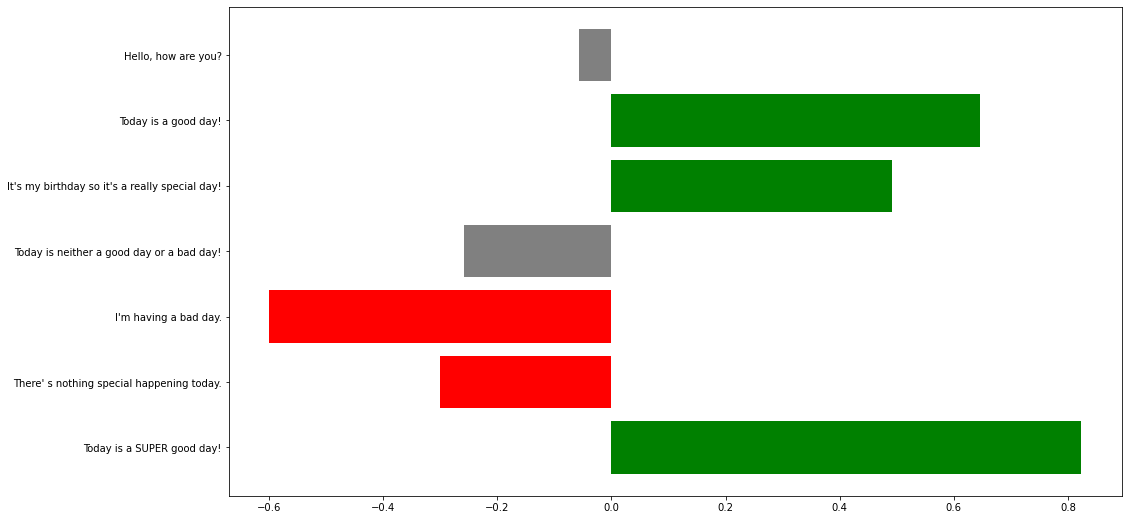

In [26]:
plt.figure(figsize=(16,9))
plt.barh(df['comments'], df['combo']+0.01, color = df['combo'].apply(colorizer))
plt.gca().invert_yaxis()
#plt.xticks(rotation=90)
plt.show()